In [1]:
import os
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
from tensorflow.keras.constraints import min_max_norm
from tensorflow.keras import Input
from tensorflow.keras import initializers
import os as os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

In [2]:
# Function to initialize GPU
def prep_devices():
    phy_gpus = tf.config.list_physical_devices(device_type='GPU')
    
    for gpu in phy_gpus:
        tf.config.experimental.set_memory_growth(device=gpu, enable=True)

    log_gpus = tf.config.list_logical_devices(device_type='GPU')
    phy_cpus = tf.config.list_physical_devices(device_type='CPU')
    log_cpus = tf.config.list_logical_devices(device_type='CPU')

    print("Physical GPUs: {}\tLogical GPUs: {}\nPhysical CPUs: {}\tLogical CPUs: {}".format(len(phy_gpus),
                                                                                             len(log_gpus),
                                                                                             len(phy_cpus),
                                                                                             len(log_cpus)))

In [20]:
# Function to synthetically generate data
def generate_data():
    X, y, coef = datasets.make_regression(n_samples=50000, n_features=100, n_informative=10, coef=True)
    y = np.reshape(y, newshape=[50000, 1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # normalizing input features
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, y_train, X_test, y_test, coef

In [4]:
# Function to get data from file
def get_data():
    df = pd.read_csv(filepath_or_buffer='./download//DATA/fake_reg.csv')
    X = df[['feature1', 'feature2']]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # normalizing input features
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, y_train, X_test, y_test

In [21]:
# Get training and test sets
X_train, y_train, X_test, y_test, coef = generate_data()
print("Coefficients:\n{}".format(coef))
print("Training records:{} \tTest records:{}".format(len(X_train), len(X_test)))

#X_train, y_train, X_test, y_test = get_data()
#print("Training records:{}\tTest records:{}".format(len(X_train), len(X_test)))

Coefficients:
[ 0.         13.13562333  0.          0.          0.          0.
  0.          0.          0.          0.         95.16524675  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         91.30103352  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         90.62341834  0.          0.         99.86516732
  0.          0.          0.         87.74293753  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         38.69426025  0.
  0.          0.          0.          0.          0.          0.
  0.          0.         13.11718494  0.          0.          0.
  0

In [5]:
# Prepare the GPU
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
prep_gpu()

Physical GPUs: 1	Logical GPUs: 1
Physical CPUs: 1	Logical CPUs: 1


In [22]:
# Define model
backend.clear_session()
model = Sequential()

model.add(Input(shape=(100,)))
model.add(layer=Dense(128, activation='relu'))
model.add(layer=Dropout(0.5))
model.add(layer=Dense(128, activation='relu'))
model.add(layer=Dropout(0.5))
model.add(layer=Dense(128, activation='relu'))
model.add(layer=Dense(1))

model.summary()

# Create early stopping callback
early_stop = EarlyStopping(monitor='loss', mode='min', patience=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
____________________________________________________

In [23]:
# Fit the model to the training data with CPU device
custom_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=custom_optimizer, loss='mse')
with tf.device(device_name='/device:cpu:0'):
    model.fit(x=X_train, y=y_train, epochs=100, batch_size=500, verbose=1, callbacks=[early_stop])

Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 46024.4961
Epoch 2/100
75/75 [==============================] - 0s 7ms/step - loss: 42358.2617
Epoch 3/100
75/75 [==============================] - 0s 7ms/step - loss: 39900.1953
Epoch 4/100
75/75 [==============================] - 0s 7ms/step - loss: 38344.1914
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 33762.2578
Epoch 6/100
75/75 [==============================] - 1s 7ms/step - loss: 33869.3359
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 30815.7363
Epoch 8/100
75/75 [==============================] - 0s 6ms/step - loss: 29136.7656
Epoch 9/100
75/75 [==============================] - 0s 6ms/step - loss: 27092.5410
Epoch 10/100
75/75 [==============================] - 0s 6ms/step - loss: 26813.8086
Epoch 11/100
75/75 [==============================] - 0s 7ms/step - loss: 25093.0684
Epoch 12/100
75/75 [==============================] - 0s 7ms/step - loss: 

<AxesSubplot:>

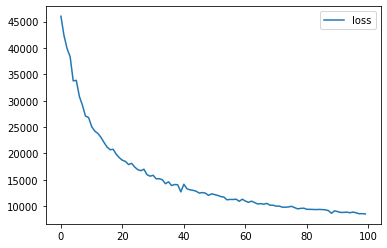

In [24]:
# Evaluate model performance
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

In [25]:
# Fit the model to the training data with GPU device
custom_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=custom_optimizer, loss='mse')
with tf.device(device_name='/device:gpu:0'):
    model.fit(x=X_train, y=y_train, epochs=100, batch_size=500, verbose=1, callbacks=[early_stop])

Epoch 1/100
75/75 [==============================] - 0s 3ms/step - loss: 9796.4512
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 8174.7354
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 8794.1797
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 8408.3965
Epoch 5/100
75/75 [==============================] - 0s 3ms/step - loss: 8423.6445
Epoch 6/100
75/75 [==============================] - 0s 3ms/step - loss: 8417.0029
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 8366.1104
Epoch 8/100
75/75 [==============================] - 0s 3ms/step - loss: 8364.6807
Epoch 9/100
75/75 [==============================] - 0s 3ms/step - loss: 8193.8438
Epoch 10/100
75/75 [==============================] - 0s 3ms/step - loss: 8199.1270
Epoch 11/100
75/75 [==============================] - 0s 3ms/step - loss: 8075.1528
Epoch 12/100
75/75 [==============================] - 0s 3ms/step - loss: 7902.5171
E

<AxesSubplot:>

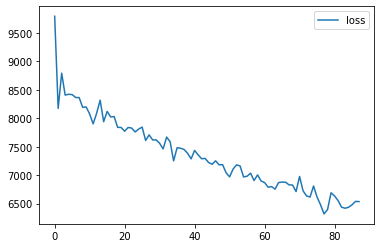

In [26]:
# Evaluate model performance
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()